In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf

In [2]:
%cd ..

/Users/yg/code/github/DS-GA-1013-Project


In [3]:
np.random.seed(1234)

In [29]:
def fspecial_gauss(size, sigma):
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/(g.sum())

batch_size = 32
dimension1 = 32
dimension2 = 32
color_dimension = 3
sigma = 0.001
#sigma = 2

blur_kernel = fspecial_gauss(size=5, sigma=2)
blur_kernel_repeat = blur_kernel.reshape((5, 5, 1, 1))
blur_kernel_repeat = np.repeat(blur_kernel_repeat, color_dimension, axis=2)
blur_kernel_tensor = tf.constant(blur_kernel_repeat, dtype=tf.float32)

In [30]:
def gaussian_noise_layer(input_layer, sigma):
    noise = tf.random_normal(shape=tf.shape(input_layer), mean=0.0, stddev=sigma, dtype=tf.float32)
    return input_layer + noise

def blur_model(input):
    blurred = tf.nn.depthwise_conv2d(input, blur_kernel_tensor, strides=[1,1,1,1], padding='SAME')
    return blurred

def blur_noise(input):
    blurred = tf.nn.depthwise_conv2d(input, blur_kernel_tensor, strides=[1,1,1,1], padding='SAME')
    return gaussian_noise_layer(blurred, sigma)

def blur_gramian(input):
    return blur_model(blur_model(input))

In [31]:
def load_png(file_name):
    with open(file_name,'rb') as f:
        img = Image.open(f).convert("RGB")
        image = np.asarray(img)
    return image

In [32]:
img = load_png("../neumann_networks_code/testing_data/cifar/0_cat.png")
array_of_images = np.asarray([img])
array_of_images = array_of_images / 255.0
data_tf = tf.convert_to_tensor(array_of_images, np.float32)
sess = tf.InteractiveSession()  
blurred_img = np.squeeze(blur_model(data_tf).eval())
corrupted_img = np.squeeze(blur_noise(data_tf).eval())
gramian_img =  np.squeeze(blur_gramian(data_tf).eval())
sess.close()

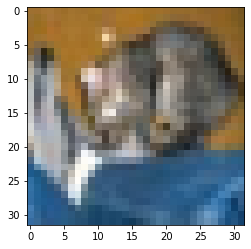

In [33]:
imgplot = plt.imshow(img)
plt.show()

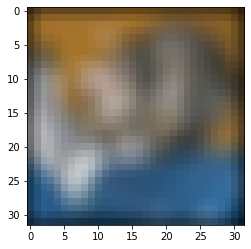

In [34]:
imgplot = plt.imshow(blurred_img)
plt.show()

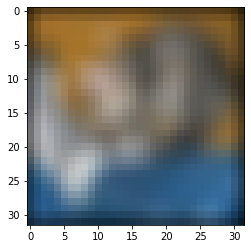

In [35]:
imgplot = plt.imshow(corrupted_img)
plt.show()

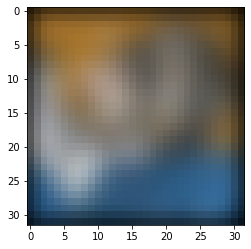

In [36]:
imgplot = plt.imshow(gramian_img)
plt.show()

In [20]:
gramian_img.shape

(32, 32, 3)